<a href="https://colab.research.google.com/github/arquejadalucy/robotica/blob/main/1_DronePlanar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agora é sua vez

Determine a posição ($x(t)$, $y(t)$) e a orientação ($\phi(t)$) e crie uma animação de um drone planar, dadas as seguintes velocidades:

\begin{align}
v_x(t)&=-2\pi \sin(2\pi t) \, , \\
v_y(t)&=2\pi \cos(2\pi t) \, ,\\
\omega(t)&= 0.01 \, ,\\
\end{align}
onde $v_x(t)$ e $v_y(t)$ correspondem à velocidade linear do drone nos eixos x e y, respectivamente, e $\omega(t)$ representa sua velocidade angular. Tal que,

$$
x(t)= \int_0^t v_x(\tau) d\tau\, , \quad x(0)=1\, \text{m}, \\
y(t)= \int_0^t v_y(\tau) d\tau\, , \quad y(0)=0\, \text{m}, \\
\phi(t)= \int_0^t \omega(\tau) d\tau\, , \quad \phi(0)=0\, \text{rad} .
$$


In [69]:
import os
if not os.path.isdir('robotica'):
  !git clone https://github.com/andrefcoelho/robotica.git
else:
  os.chdir('robotica')
  !git pull
  os.chdir("..")
import numpy as np
import math
import importlib
import robotica.roblib as rl
importlib.reload(rl)
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
print('\nBibliotecas carregadas. Divirta-se!')


Already up to date.

Bibliotecas carregadas. Divirta-se!


DEFINIR A FUNÇÃO DE INTEGRAÇÃO NUMÉRICA

In [70]:
def integrator(v, p0, dT):
  """
    Integrador Numérico (aproximação)
  """
  p = np.zeros_like(v)
  p[0] = p0
  for i in range(len(p)-1):
    p[i+1] = p[i] + v[i]*dT 
  return p

DEFINIR OS INTERVALOS DE TEMPO

In [71]:
# definir t como uma série de pontos de 0 a 3 segundos
tFinal = 3     # tempo total [segundos]
dT = 0.0001     # intervalo [s]
t = np.linspace(0, tFinal, round(tFinal/dT)+1)   # cria t como espaço linear 

### POSIÇÃO NO EIXO X = $x(t)$

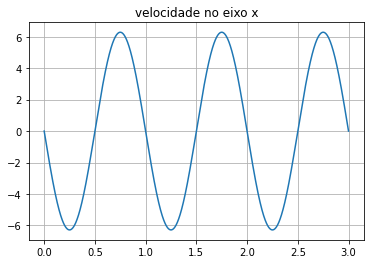

In [72]:
# definir e plotar a função da velocidade linear no eixo x
vx = -2*math.pi*(np.sin(2*math.pi*t))

plt.plot(t, vx, '-')
plt.title("velocidade no eixo x")
plt.grid()
plt.show()

Text(0.5, 1.0, 'posição no eixo x')

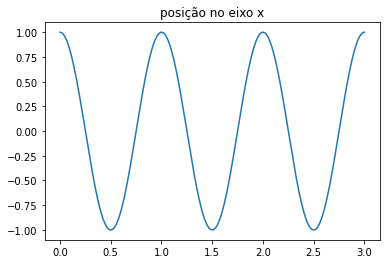

In [81]:
# Definir e plotar função x(t) - integral de vx(t) calculada manualmente
x_original = np.cos(2*math.pi*t)

plt.plot(t, x_original, '-', label="x(t) original")
plt.title("posição no eixo x")

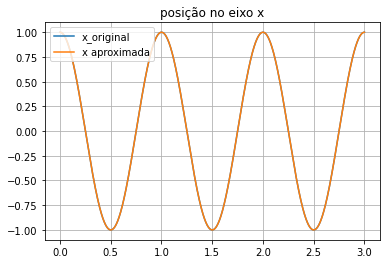

In [82]:
x0 = 1
x = integrator(vx, x0, dT)

plt.plot(t, x_original, '-', label="x_original")
plt.plot(t, x, '-', label="x aproximada")
plt.title("posição no eixo x")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Teste aumentando o intervalo de tempo

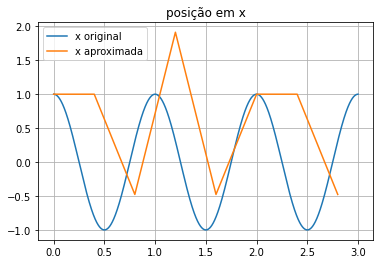

In [83]:
dTSampled=0.4  #[s]
samples=math.ceil(dTSampled/dT)
tSampled= t[::samples] 
vxSampled= vx[::samples]

xSampled=integrator(vxSampled,x0,dTSampled)

plt.plot(t, x_original, '-', label="x original")
plt.plot(tSampled, xSampled, '-', label="x aproximada")
plt.title("posição em x")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### POSIÇÃO NO EIXO Y = $y(t)$

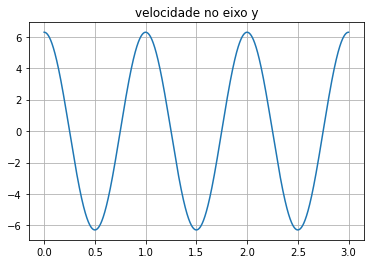

In [85]:
# definir e plotar a função da velocidade linear no eixo y
vy = 2*math.pi*(np.cos(2*math.pi*t))

plt.plot(t, vy, '-')
plt.title("velocidade no eixo y")
plt.grid()
plt.show()

Text(0.5, 1.0, 'posição no eixo y')

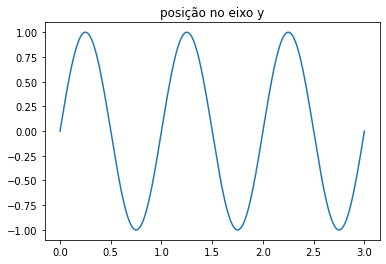

In [88]:
# Definir e plotar função y(t) - integral de vy(t) calculada manualmente
y_original = np.sin(2*math.pi*t)

plt.plot(t, y_original, '-', label="y(t) original")
plt.title("posição no eixo y")

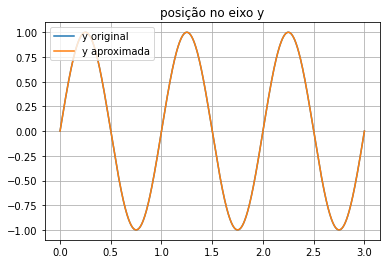

In [89]:
y0 = 0
y = integrator(vy, y0, dT)

plt.plot(t, y_original, '-', label="y original")
plt.plot(t, y, '-', label="y aproximada")
plt.title("posição no eixo y")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Teste aumentando os intervalos de tempo

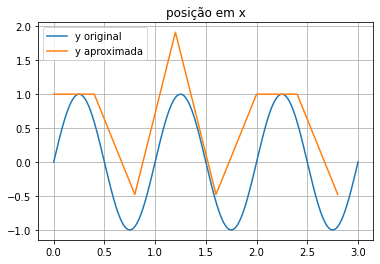

In [107]:
dTSampled=0.4  #[s]
samples=math.ceil(dTSampled/dT)
tSampled= t[::samples] 
vySampled= vy[::samples]

ySampled=integrator(vxSampled,x0,dTSampled)

plt.plot(t, y_original, '-', label="y original")
plt.plot(tSampled, ySampled, '-', label="y aproximada")
plt.title("posição em x")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Orientação ($\phi(t)$)

Text(0.5, 1.0, 'orientação')

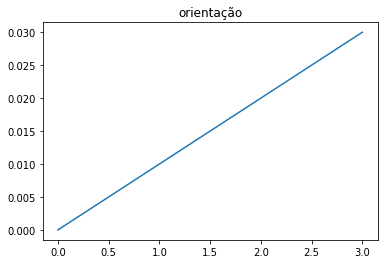

In [118]:
# Definir e plotar função phi(t) - integral de w(t) calculada manualmente
phi_original = 0.01*t

plt.plot(t, phi_original, '-', label="phi(t) original")
plt.title("orientação")

In [98]:

# IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed
'''w = 0.01   # velocidade angular
phi0 = 0
phi = integrator(w, phi0, dT)

plt.plot(t, phi_original, '-', label="phi original")
plt.plot(t, phi, '-', label="phi aproximada")
plt.title("orientação")
plt.legend(loc="upper left")
plt.grid()
plt.show()'''

'w = 0.01   # velocidade angular\nphi0 = 0\nphi = integrator(w, phi0, dT)\n\nplt.plot(t, phi_original, \'-\', label="phi original")\nplt.plot(t, phi, \'-\', label="phi aproximada")\nplt.title("orientação")\nplt.legend(loc="upper left")\nplt.grid()\nplt.show()'

# ANIMAÇÃO

In [119]:
def rectangularShape(center,width,height,angle):
  """
    Determina os quatro vértices de um retângulo dada a posição de seu centro (center), sua largura (width), sua altura (height) e sua orientação (angle). 
  """
  leftBottom=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]).dot(np.array([-width/2,-height/2]))+center
  leftTop=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]).dot(np.array([-width/2,height/2]))+center
  rightBottom=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]).dot(np.array([width/2,-height/2]))+center
  rightTop=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]).dot(np.array([width/2,height/2]))+center
  points = [leftBottom,rightBottom,rightTop,leftTop]
  return points

dTAnim=0.1                     # tempo de amostragem da animacao [s]
samples=math.ceil(dTAnim/dT)   # taxa de amostragem do novo vetor
xAnim=x[::samples]             # vetor z com novo numero de amostras
angleAnim=phi_original # vetor de angulos (no momento, tudo zero)
yAnim=y[::samples]             # vetor z com novo numero de amostras

height=1                       # altura do retangulo
width=0.07                     # largura do retangulo



# Configura a figura, os eixos e o poligono a ser plotado
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( -3, 3))
ax.set_ylim((-1, 1))


patch=plt.Polygon([[0,0],[0,0]])   #inicializa o poligono


# inicializa a funcao de animacao: plota o drone e o fundo 
def init():
    patch.xy=rectangularShape([xAnim[0], yAnim[0]],height,width, angleAnim[0]) 
    ax.add_patch(patch)
    return patch,

# funcao de animacao
def animate(i):
    patch.xy=patch.xy=rectangularShape([xAnim[i], yAnim[i]],height,width, angleAnim[i])
    return patch,
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=len(xAnim), interval=round(dTAnim/0.001), blit=True)

rc('animation', html='jshtml')
anim

